<a href="https://colab.research.google.com/github/pnp642001/Medical_Appointment_No_Show_Time/blob/main/Medical_Appointment_No_Showtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALYSIS OF MEDICAL APPOINTMENT NO-SHOW SCENARIO**

###**ATTEMPTED BY: PARTH PATEL**



---
We know that doctors are the saviours. Whenever someone is not feeling well, they immediately want to see a doctor. For this, they need to take an appointment. Once the appointment is scheduled, it is expected that that patient will arrive on time. However, always, this is the not case. Many a times, patients skip the appointment ans thus, wasting the doctor's time and also, the slot.
In this notebook, we will try to find certain reasons and insights about why and who tend to skip the appointment, also, which factors contribute in such scenario.


---



---





## **DATA-SET DECRIPTION**

Dataset Source: Kaggle<br>
Total Entries: 110,528<br>
Total Columns: 14<br>
Usage License: CC BY-NC-SA 4.0<br>
Dataset Owner: JoniHoppen<br>

---


###LOADING THE DATASET AND CHECKING FOR THE MISSING VALUES AND SOME OTHER MODIFICATIONS

In [ ]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Now, making the plots inline

%matplotlib inline

#Setting the plot style as white-grid

sns.set_style("whitegrid")
#Firstly, importing the data-set and taking a glimpse of it.
#The data-set is taken from Kaggle.

df=pd.read_csv("Appointment_data.csv")


In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#Checking the shape
df.shape

(110527, 14)

In [ ]:
#Checking the datatypes of the columns

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
#Getting the basic stats with the help of in-built functions

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
#Checking for missing or null values in the data-set

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
#Looking the above output, there are no missing or null values found in the data-set

#Hence, we can proceed further

#Now, we will check for the duplicate values in the data-set

df.duplicated().sum()

0

In [ ]:
#Looking at the above output, it is clear that there is no data duplication.


##OBSERVATION :

It is evident that there are no missing and duplicate values in the dataset and also, only little amendments were needed to make data compatible.

##**Data Cleaning :**

* Drop irrelevant columns
* Modify column names
* Correct data types
* Turn no-show column with integer values
* Create a new column for days difference between scheduling an appointment

In [ ]:
#Now,we will remove the irrelevant columns

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
#One thing is very clear from the dataset and from our required output, that columns- PatientId and AppointmentID are not required because
#they are not showing any relevance 

#Hence, dropping the columns

df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [ ]:
#Now, before moving forward, we will have to change the datatypes of ScheduledDay and AppointmentDay from object to date-time as we will 
#need to calculate the timespan between both.

df[['ScheduledDay','AppointmentDay']]=df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)

In [ ]:
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [ ]:
#Hence, the datatype is changed.
#Now, we will change the datatype of no_show 

df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.dtypes

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
no_show                         int64
dtype: object

,0
0,gender
1,scheduledday
2,appointmentday
3,day_diff
4,age
5,neighbourhood
6,scholarship
7,hipertension
8,diabetes
9,alcoholism


In [ ]:
# Create a new column for days difference between scheduling and appointment
day_difference=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days 
df.insert(3,'day_difference',day_difference)
df.day_difference.dtype

dtype('int64')

In [ ]:
df.head()

,gender,scheduledday,appointmentday,day_difference,day_diff,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1


##**MAIN SECTION:**

,no_show
no_show,
0,22319
1,88208


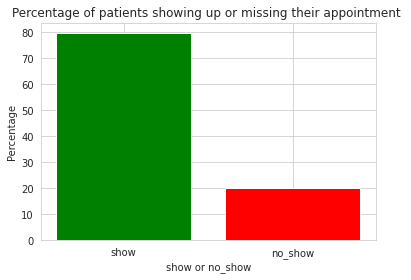

In [ ]:
#Now, we will check, how many patients showed-up on time and how many skipped.

show=len(df[df.no_show==1])/len(df.no_show)
no_show=len(df[df.no_show==0])/len(df.no_show)
#no_show=1 show=0

plt.bar(['show','no_show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no_show');
display(df.groupby('no_show')[['no_show']].count())

###It is evident we will be more focussed towards the patients who have not showed up.

####**FACTORS TO CONSIDER:**

In [ ]:

#Creating some filters for easier processing

show=(df.no_show==0)
no_show=(df.no_show==1)
total_miss=len(df[no_show])
total=len(df)



**LOOKING FOR INSIGHTS THROUGH GENDER:**

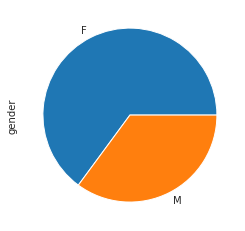

In [ ]:

#Checking on the basis of gender

gender_no_show=df[no_show]['gender'].value_counts()

gender_no_show.plot(kind='pie')

In [ ]:
pd.DataFrame(gender_no_show*100/total)

,gender
F,51.793679
M,28.013065


Text(0, 0.5, 'number of patients')

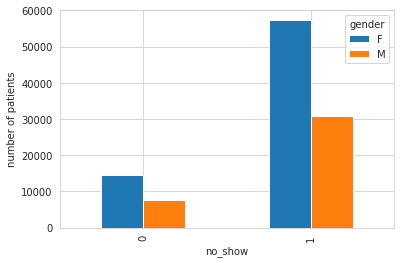

In [ ]:
df.groupby(['gender','no_show']).size().unstack('gender').plot(kind='bar').set_ylabel('number of patients')

###**OBSERVATION:**
It is pretty evident that Females are more likely to skip appointments compared to males.

**The number of females skipping the appointment is almost double compared to males**

---

**Are patients with scholarships more likely to miss their appointment?:**

Text(0, 0.5, 'number of patients')

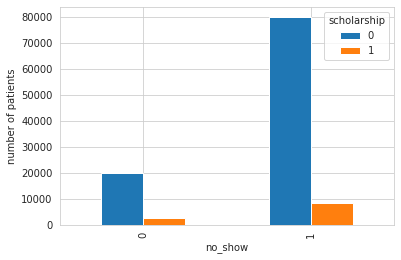

In [ ]:
#In scholarship, 0 -> have scholarship and 1 -> no scholarship

df.groupby(['no_show','scholarship']).size().unstack('scholarship').plot(kind='bar').set_ylabel('number of patients')
#HERE 0-> 

###**OBSERVATION:**

It is clear that people with scholarship are more likely to miss the appointment
---

**HYPERTENSION:**

Text(0, 0.5, 'number of patients')

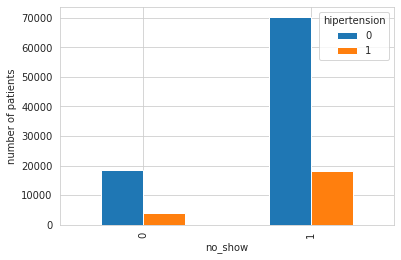

In [ ]:
# Here, 0-> have hypertension and 1-> do not have
df.groupby(['hipertension','no_show']).size().unstack('hipertension').plot(kind='bar').set_ylabel('number of patients')

#### It seems that patients with hypertension are actually more likely to show up for their appointment

##**SMS:**

Text(0, 0.5, 'number of patients')

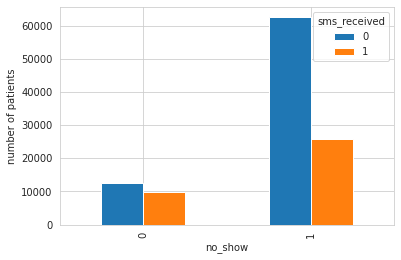

In [ ]:
#HERE, 0->received sms and 1-> not received 
df.groupby(['sms_received','no_show']).size().unstack('sms_received').plot(kind='bar').set_ylabel('number of patients')

####patients who received an SMS are more likely to miss their appointment !!

###**DIFFERNCE BETWEEN SCHEDULING DATE AND APPOINTMENT DATE:**

the propotion of different time difference for patients who missed their appiontments:


,day_diff2
sameday,41.686695
more_than_4,20.859786
more_than_15,20.023127
fewdays,17.430392


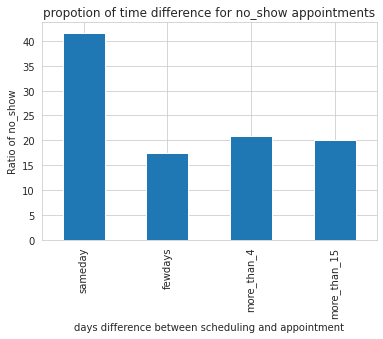

In [ ]:
#Difference between Scheduling days
#filter for positive day difference
difference_1=df[df.day_difference>=0]
# difference_1.day_diff.unique()
#turn day diff into categorical column Day_diff2
bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(difference_1.day_diff,bin_edges,labels=names)
#filter for no_show records and count values for each category of day_diff2

no_show_day_diff=df[no_show].day_diff2.value_counts()/len(df[no_show])*100
no_show_day_diff.reindex(names).plot(kind='bar');
plt.title('propotion of time difference for no_show appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no_show');
print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

###the longer the period between the scheduling and appointment the more likely the patient won't show up.

###**AGE:**

Text(0.5, 1.0, 'Histogram of age values for patients who showed up or missed their appointment')

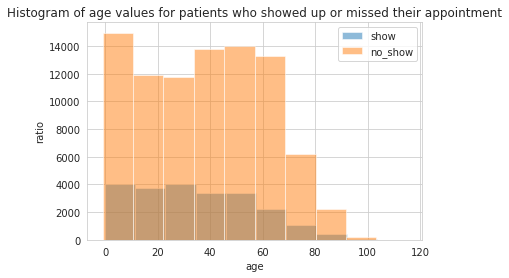

In [ ]:
#plot the histograns of age for patients who showed up and who didn't
df[show].age.hist(alpha=0.5,label='show')
df[no_show].age.hist(alpha=0.5,label='no_show')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')


##**NO ACCURATE RELATION FOUND WITH RESPECT TO AGE**



---

# ***CONCLUSION:***



*   Females miss appointments at a rate that is almost twice as high as males. Therefore, women are more prone to miss for an appointment.

*  It appears that patients who receive scholarships have a higher likelihood of skipping their appointment.

*  It seems that the likelihood that the patient won't show up increases with the length of time between scheduling and appointment.

*  Although there isn't a direct correlation between age and whether or not the patients show up for their appointments, younger patients are more likely to do so.

*  Apparently, patients who received an SMS are more likely to miss their appointment, according to this bizarre data.

